In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set Matplotlib Parameters
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=18)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 18

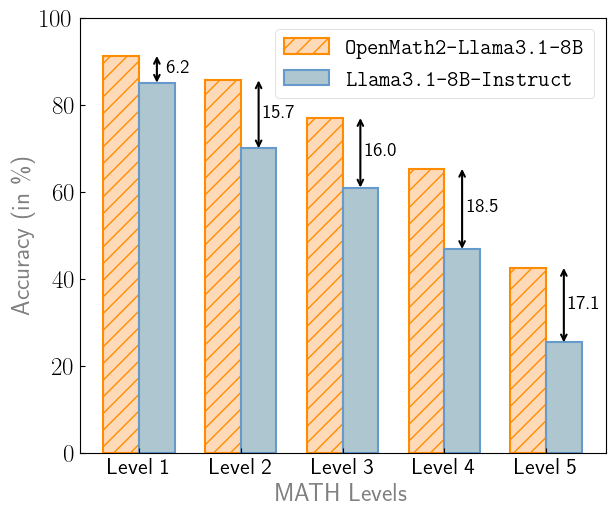

In [2]:
# Data
levels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

openmath_scores_dict= { 'Level 1': 399, 'Level 2': 766, 'Level 3': 871, 'Level 4': 793, 'Level 5': 563}
llama_scores_dict = {'Level 1': 372, 'Level 2': 626, 'Level 3': 690, 'Level 4': 569, 'Level 5': 336}
total = {'Level 1': 437, 'Level 2': 894, 'Level 3': 1131, 'Level 4': 1214, 'Level 5': 1324,}

openmath_scores = [(openmath_scores_dict[level] * 100.0)/total[level] for level in levels]  # Scores for Method 1
llama_scores = [(llama_scores_dict[level] * 100.0)/total[level] for level in levels]  # Scores for Method 2

# Number of levels
n_levels = len(levels)

# Set width of bars and position for each level
bar_width = 0.35  # Width of the bars
index = np.arange(n_levels)  # The x locations for the groups

# Plot
fig, ax = plt.subplots(figsize=(6, 5))  # A square figure with equal width and height
ax.grid(False)

bar1 = ax.bar(index, openmath_scores, bar_width, label='\\texttt{OpenMath2-Llama3.1-8B}', 
              color="#FFDAB9", edgecolor="#FF8C00", hatch="//", linewidth=1.5)
bar2 = ax.bar(index + bar_width, llama_scores, bar_width, label='\\texttt{Llama3.1-8B-Instruct}', 
              color="#AEC6CF", linewidth=1.5, edgecolor='#6699CC')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('MATH Levels', color='grey')
ax.set_ylabel('Accuracy (in \%)', color='grey')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(levels)
ax.set_ylim([0, 100]) 

ax.legend(loc='upper right')

# Drawing the 2-sided arrows to indicate the gap between bars
for i in range(n_levels):
    method1_height = openmath_scores[i]
    method2_height = llama_scores[i]
    gap = method1_height - method2_height

    # Midpoint for placing the arrow (above the taller bar)
    midpoint = (method1_height + method2_height) / 2

    if gap < 5.0:
        arrowstyle = '<->'
        mutation_scale=5
    else:
        arrowstyle = '<->'
        mutation_scale=10
    # Drawing a 2-sided arrow
    ax.annotate(
        '', 
        xy=(index[i] + bar_width, method1_height), 
        xytext=(index[i] + bar_width, method2_height), 
        arrowprops=dict(arrowstyle=arrowstyle, color='black', shrinkA=0, shrinkB=0, lw=1.5, mutation_scale=mutation_scale)
    )

    # Add text to indicate the gap
    ax.text(index[i] + 1.6 * bar_width, midpoint - 1.5,  f'{gap:.1f}', ha='center', va='bottom', fontsize=14)

# Show the plot
plt.tight_layout(pad=0.1)
plt.savefig("../plots/math_level_comp.jpg", format='jpg', dpi=300)
plt.savefig("../plots/math_level_comp.pdf", format='pdf', dpi=300)
plt.show()